In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# INPUT DATA
ke = 9e9
Q = [1e-9]  # charges

xQ = [0]  # coordinates of charges
yQ = [0]
zQ = [0]

xA = 1
yA = 1
zA = 1

r = math.sqrt((xA - xQ[0]) ** 2 + (yA - yQ[0]) ** 2 + (zA - zQ[0]) ** 2)

rx = (xA - xQ[0]) / r
ry = (yA - yQ[0]) / r
rz = (zA - zQ[0]) / r

E0 = ke * Q[0] / r ** 2

Ex = E0 * rx
Ey = E0 * ry
Ez = E0 * rz

streak_arrow = 1  
xmin, xmax = -1, 1
ymin, ymax = -1, 1
zmin, zmax = -1, 1

In [10]:
# CALCULATION
Nx, Ny, Nz = 10, 10, 10
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
z = np.linspace(zmin, zmax, Nz)
X, Y, Z = np.meshgrid(x, y, z)

Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)
Ez = np.zeros_like(Z)

for iN in range(len(Q)):
    r = np.sqrt((X - xQ[iN])**2 + (Y - yQ[iN])**2 + (Z - zQ[iN])**2)
    E = ke * Q[iN] / r / r

    Ex += E / r * (X - xQ[iN])  # x-component of vector field
    Ey += E / r * (Y - yQ[iN])  # y-component of vector field
    Ez += E / r * (Z - zQ[iN])  # z-component of vector field

    condition = np.where(r < 0.3)
    Ex[condition] = 0
    Ey[condition] = 0
    Ez[condition] = 0

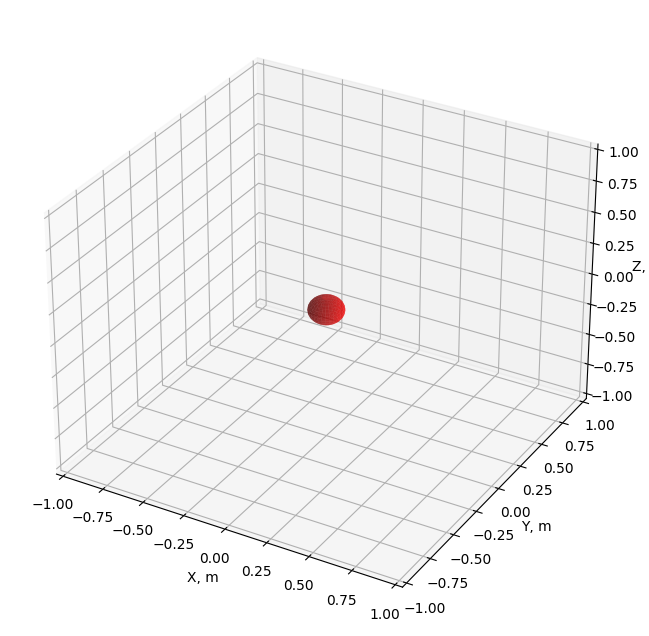

In [11]:
# FIGURES
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
if streak_arrow:
    # You would need to provide the streakarrow3d function or use a similar one.
    pass
else:
    ax.quiver(X, Y, Z, Ex, Ey, Ez, length=0.2, normalize=True, color='b')

# Draw charged particles
for iN in range(len(Q)):
    radius = 0.1
    phi = np.linspace(0, 2 * np.pi, 30)
    theta = np.linspace(0, np.pi, 15)
    phi, theta = np.meshgrid(phi, theta)
    x1 = radius * np.sin(theta) * np.cos(phi) + xQ[iN]
    y1 = radius * np.sin(theta) * np.sin(phi) + yQ[iN]
    z1 = radius * np.cos(theta) + zQ[iN]
    ax.plot_surface(x1, y1, z1, color='r', alpha=0.6)
# Axis properties
ax.set_xlabel('X, m')
ax.set_ylabel('Y, m')
ax.set_zlabel('Z, m')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)

plt.show()